# Ejercicio 6

In [46]:
import matplotlib.pyplot  as plt
import matplotlib.patches as patches
import numpy as np
import itertools

In [47]:
def splane(X,Y,axs):
    axs.axvline(0, color='black', linewidth=1, zorder=-1)
    axs.axhline(0, color='black', linewidth=1, zorder=-1)
    axs.set_title('S-Plane', fontsize=16)
    axs.set_xlabel('$\\sigma$', fontsize=16)
    axs.set_ylabel('$j\\omega$', fontsize=16)
    axs.set_xlim(X[0]-1, X[-1]+1)
    axs.set_ylim(Y[0]-1, Y[-1]+1)
    
    for x in X:
        xs = x + np.zeros(len(Y))
        if x < 0:
            axs.scatter(xs, Y, marker='^', c='blue', edgecolors='black', s=75)
        elif x == 0:
            axs.scatter(xs, Y, marker='o', c='green', s=75)
        else:
            axs.scatter(xs, Y, marker='v', c='red', edgecolors='black', s=75)
    


In [48]:
def bilinear(sigma, omega, Ts):
    s = sigma + 1j*omega
    temp = s*Ts/2
    if temp == 1:
        return float('nan')
    return (1 + temp)/(1 - temp)

In [49]:
def zplane(Z, axs):
    axs.axvline(0, color='black', linewidth=1, zorder=-1)
    axs.axhline(0, color='black', linewidth=1, zorder=-1)
    axs.set_title('Z-Plane', fontsize=16)
    axs.set_xlabel('Re(z)', fontsize=16)
    axs.set_ylabel('Im(z)', fontsize=16)
    axs.set_xlim(-2.5, 2.5)
    axs.set_ylim(-2.5, 2.5)
    axs.add_patch(patches.Circle((0,0), radius=1, fill=False, color='black', ls='solid'))
    for z in Z:
        r = np.abs(z)
        if r < 1:
            axs.scatter(np.real(z), np.imag(z), marker='^', c='blue', edgecolors='black', s=75)
        elif r == 1:
            axs.scatter(np.real(z), np.imag(z), marker='o', c='green', s=75)
        else:
            axs.scatter(np.real(z), np.imag(z), marker='v', c='red', edgecolors='black', s=75)
    

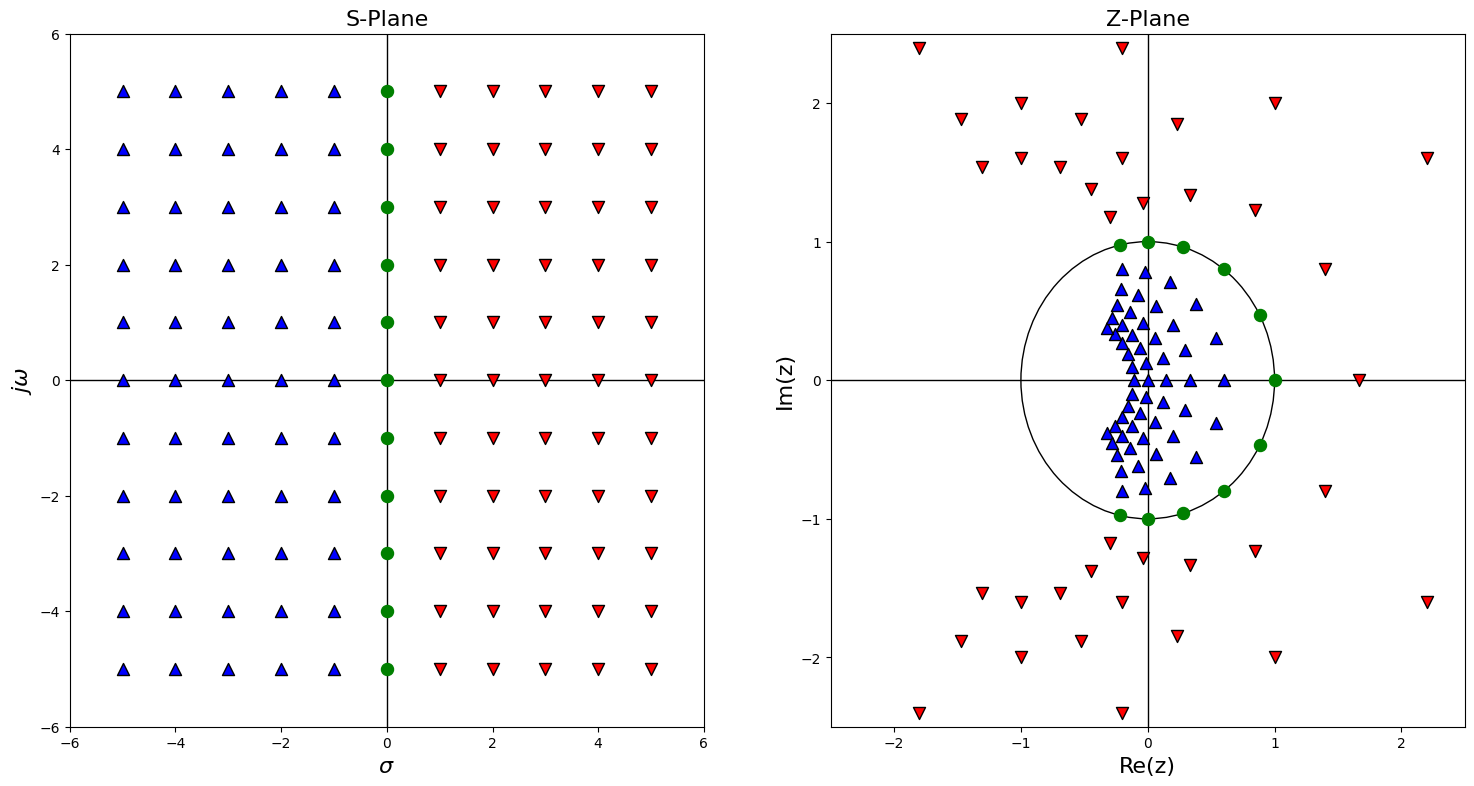

In [50]:
sigma = np.arange(-5,6,1)
omega = np.arange(-5,6,1)
Ts = 0.5
z = np.array([bilinear(s,o,Ts) for s,o in itertools.product(sigma,omega)])
z = z[~np.isnan(z)]

fig,axs = plt.subplots(1,2,figsize=(18,9))
splane(sigma, omega, axs[0])
zplane(z,axs[1])
plt.show()